In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

import mglearn

In [44]:
df = pd.read_csv('data/tweet_data.csv')

In [45]:
df.head()

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the E...,Business,23464532,5988062,The Economist,NaN
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,America's economy is flashing some warning sig...,Business,1732809,16184358,CNN Business,NaN
2,1070868012864028673,2018-12-07 02:30:04,-1,-1,12,False,True,False,8,NaN,4,-1,Lyft files for what is expected to be one of t...,Business,2253989,25053299,FORTUNE,NaN
3,1070867995239555075,2018-12-07 02:30:00,-1,-1,5,False,True,False,4,NaN,1,-1,"Exporters still waiting to get Rs 6,000 crore ...",Business,1704056,43855487,Business Standard,NaN
4,1070867995205885952,2018-12-07 02:30:00,-1,-1,5,False,True,False,2,NaN,3,-1,Ride-hailing firm Lyft races to leave Uber beh...,Business,1997662,15110357,Reuters Business,https://video.twimg.com/amplify_video/10708116...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785916 entries, 0 to 785915
Data columns (total 18 columns):
tweetID       785916 non-null int64
crDate        785916 non-null object
edInput       785916 non-null int64
editor        785916 non-null int64
engages       785916 non-null int64
isApproved    785916 non-null bool
isEdNeed      785916 non-null bool
isRT          785916 non-null bool
likes         785916 non-null int64
photoUrl      277896 non-null object
retweets      785916 non-null int64
rtUsID        785916 non-null int64
text          785916 non-null object
topicName     785916 non-null object
usFlwrs       785916 non-null int64
usID          785916 non-null int64
usName        785916 non-null object
videoUrl      140491 non-null object
dtypes: bool(3), int64(9), object(6)
memory usage: 92.2+ MB


In [5]:
df.describe()

,tweetID,edInput,editor,engages,likes,retweets,rtUsID,usFlwrs,usID
count,7.859160e+05,785916.000000,785916.000000,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05
mean,1.115213e+18,0.206035,2311.963123,1.403637e+03,1.085909e+03,3.177282e+02,4.365098e+16,4.472701e+06,1.085276e+17
std,2.925292e+16,1.439867,2495.158883,1.665960e+04,1.293993e+04,4.053267e+03,1.894384e+17,9.149778e+06,3.010486e+17
min,5.354500e+04,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.200000e+01
25%,1.095791e+18,-1.000000,-1.000000,2.300000e+01,1.600000e+01,6.000000e+00,-1.000000e+00,1.426280e+05,1.551377e+07
50%,1.116465e+18,-1.000000,-1.000000,6.400000e+01,4.500000e+01,1.800000e+01,-1.000000e+00,9.668265e+05,3.618422e+07
75%,1.137676e+18,1.000000,5003.000000,2.500000e+02,1.840000e+02,6.500000e+01,-1.000000e+00,3.603135e+06,9.545908e+08
max,1.154179e+18,4.000000,5101.000000,4.152927e+06,3.206434e+06,1.335638e+06,1.108957e+18,1.057384e+08,1.153467e+18


In [6]:
df.columns

Index(['tweetID', 'crDate', 'edInput', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'photoUrl', 'retweets', 'rtUsID', 'text',
       'topicName', 'usFlwrs', 'usID', 'usName', 'videoUrl'],
      dtype='object')

In [7]:
df['topicName'].unique()

array(['Business', 'Animal', 'Memes', 'Nature', 'Travel', 'Interesting',
       'News', 'Fashion', 'Art', 'Personal Development', 'Motivational',
       'DIY & Craft', 'Editorial Pics', 'Funny', 'Poem', 'World Leaders',
       'Entrepreneurship', 'US News', 'Journalists', 'Flowers',
       'Cryptocurrency', 'Photography', 'Design & Architecture',
       'Fitness', 'Spirituality', 'Startup', 'Space', 'Technology',
       'Digital Media & Internet', 'Psychology', 'Science', 'Basketball',
       'Humor', 'Mindfulness', 'Medical', 'Informative', 'Love', 'Stocks',
       'Nanotech', 'Biotech', 'science', 'Random'], dtype=object)

In [28]:
df_nature = df[df['topicName']=='Nature']

In [29]:
df_nature.head()

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
44,1070875544202432514,2018-12-07 03:00:00,-1,-1,44,False,True,False,33,https://pbs.twimg.com/media/DtuIrMXWoAA5Wve.jpg,11,-1,"Lack Lake, Rocky mountain national Park, Color...",Nature,67520,917084527440355329,Sara Walker,NaN
45,1070590403454349312,2018-12-06 08:06:57,-1,-1,88,False,True,True,77,NaN,11,2470325805,How Kinky Are You?\n\nhttps://t.co/J8I1HNeD5i,Nature,4255,4530305294,Akp,NaN
46,1070591387551318016,2018-12-06 08:10:52,-1,-1,59,False,True,True,50,NaN,9,2470325805,12 Sex Scenes with Actors Who Hated Each Other...,Nature,4255,4530305294,Akp,NaN
47,1060767872903917568,2018-11-09 05:35:43,-1,-1,1817,False,True,True,1489,https://pbs.twimg.com/media/Dcnhi_FXcAAQPXk.jpg,328,2470325805,have you ever seen anyone so happy to have jam...,Nature,141170,2718980845,ღ Girls Outfit ღ,NaN
105,1070880221241327616,2018-12-07 03:18:35,-1,-1,3113,False,True,False,2174,NaN,939,-1,Like something out of a fairy tale 🦌 https://t...,Nature,132013,920512279556304901,Beauty Nature,https://video.twimg.com/ext_tw_video/107088010...


In [30]:
df_nature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25021 entries, 44 to 785895
Data columns (total 18 columns):
tweetID       25021 non-null int64
crDate        25021 non-null object
edInput       25021 non-null int64
editor        25021 non-null int64
engages       25021 non-null int64
isApproved    25021 non-null bool
isEdNeed      25021 non-null bool
isRT          25021 non-null bool
likes         25021 non-null int64
photoUrl      10615 non-null object
retweets      25021 non-null int64
rtUsID        25021 non-null int64
text          25021 non-null object
topicName     25021 non-null object
usFlwrs       25021 non-null int64
usID          25021 non-null int64
usName        25021 non-null object
videoUrl      4878 non-null object
dtypes: bool(3), int64(9), object(6)
memory usage: 3.1+ MB


In [31]:
df_nature.columns

Index(['tweetID', 'crDate', 'edInput', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'photoUrl', 'retweets', 'rtUsID', 'text',
       'topicName', 'usFlwrs', 'usID', 'usName', 'videoUrl'],
      dtype='object')

In [32]:
df_nature = df_nature.drop(['photoUrl', 'videoUrl'], axis = 1)

In [33]:
df_nature.columns

Index(['tweetID', 'crDate', 'edInput', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'retweets', 'rtUsID', 'text', 'topicName',
       'usFlwrs', 'usID', 'usName'],
      dtype='object')

In [34]:
df_nature['edInput'].value_counts()

-1    11129
 1     9269
 2     4200
 4      301
 3      122
Name: edInput, dtype: int64

In [37]:
df_nature['edInput'] != -1

44        False
45        False
46        False
47        False
105       False
          ...  
785876    False
785884    False
785885    False
785894    False
785895    False
Name: edInput, Length: 25021, dtype: bool

In [40]:
# https://www.statology.org/pandas-drop-rows-with-value/
df_nature = df_nature[df_nature['edInput'].isin([-1, 3, 4])==False]

In [41]:
df_nature['edInput'].value_counts()

1    9269
2    4200
Name: edInput, dtype: int64

In [46]:
df_nature['label'] = df_nature['edInput'].apply(
    lambda label: 1 if label == 1 else 0)

In [47]:
df_nature.head()

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,label
69430,1081464429051609089,2019-01-05 08:16:27,2,5001,1904,False,True,False,1492,412,-1,Switzerland https://t.co/HKTmJPPZt1,Nature,104918,713721447382917121,PicPublic,0
69802,1081466945956831232,2019-01-05 08:26:27,2,5001,45,False,True,True,40,5,885046854949502978,OMG 😍 This app analyzes call/text logs for any...,Nature,93,1080701950994219009,Sarah Hingis,0
69803,1081466142953156608,2019-01-05 08:23:15,2,5001,92,False,True,True,66,26,885046854949502978,OMG 😍 This app analyzes call/text logs for any...,Nature,93,1080701950994219009,Sarah Hingis,0
69858,1081458076497006593,2019-01-05 07:51:12,2,5001,84,False,True,True,60,24,885046854949502978,OMG 😍 This app analyzes call/text logs for any...,Nature,129,1080722887294636037,Abby Mel,0
69859,1081457960511926272,2019-01-05 07:50:44,2,5001,63,False,True,True,45,18,885046854949502978,OMG 😍 This app analyzes call/text logs for any...,Nature,129,1080722887294636037,Abby Mel,0


In [51]:
df_nature['label'].value_counts()

1    9269
0    4200
Name: label, dtype: int64

In [52]:
df_nature_label = df_nature[['text', 'label']]

In [53]:
df_nature_label.head()

,text,label
69430,Switzerland https://t.co/HKTmJPPZt1,0
69802,OMG 😍 This app analyzes call/text logs for any...,0
69803,OMG 😍 This app analyzes call/text logs for any...,0
69858,OMG 😍 This app analyzes call/text logs for any...,0
69859,OMG 😍 This app analyzes call/text logs for any...,0


In [59]:
df_nature_label[df_nature_label['label']==1].head()

,text,label
70388,"Sunset on palouse, Washington https://t.co/zuj...",1
70445,"Venice, Italy 🇮🇹 https://t.co/cDOSBxVr6T",1
70449,Dawn breaking viewed from across the Douglas V...,1
70515,"Landwasser Viaduct, Switzerland 🇨🇭 | Photograp...",1
70516,Mackenzie Mountains\nCanada \n\nby Marc Adamus...,1


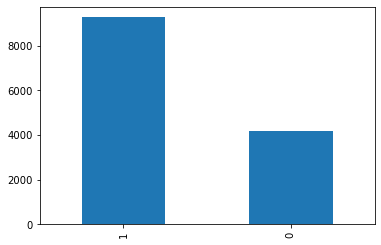

In [71]:
df_nature_label['label'].value_counts().plot(kind='bar')

In [56]:
X = df_nature_label['text'].to_numpy()
y = df_nature_label['label'].to_numpy()

In [57]:
X.shape

(13469,)

In [58]:
X[:5]

array(['Switzerland https://t.co/HKTmJPPZt1',
       'OMG 😍 This app analyzes call/text logs for any phone number! 👉 Search “All Call” in the App Store! https://t.co/r6ax0jWtYM',
       'OMG 😍 This app analyzes call/text logs for any phone number! 👉 Search “All Call” in the App Store! https://t.co/jc0bsf5f8u',
       'OMG 😍 This app analyzes call/text logs for any phone number! 👉 Search “All Call” in the App Store! https://t.co/aNZAfybavA',
       'OMG 😍 This app analyzes call/text logs for any phone number! 👉 Search “All Call” in the App Store! https://t.co/GJDOZmtrVj'],
      dtype=object)

In [60]:
y.shape

(13469,)

In [61]:
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [63]:
X_train

array(['Wildlife for all: why and how to improve access https://t.co/lJ2B5yizFi',
       'Nicknamed the “city of joy,” Kolkata—or Calcutta as it was formerly known—is the cultural capital of eastern India: a dizzying, steaming hot alloy of human longing, high and low https://t.co/a8NnL03MXP',
       'Was wondering if anyone can confirm what this is, I was guessing a European hornet but not sure??@Buzz_dont_tweet @ChrisGPackham @BBCSpringwatch https://t.co/Qna4Rrn9NG',
       ...,
       'Iceland in September is an amazing place for traveling and shooting great photos and videos. https://t.co/9kgKE87VTK',
       "If you'd like to order one here's the link!\nhttps://t.co/7lmSTNe69s",
       'Bristol Bay supports wildlife species of all kinds – including birds. Learn more about seven magnificent birds species and why they need your help. https://t.co/aXovR8x5yK'],
      dtype=object)

In [64]:
X_train.shape

(9024,)

In [65]:
type(X_train)

numpy.ndarray

In [66]:
y_train

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [67]:
y_train[:100]

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [68]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [69]:
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [2834 6190]


In [70]:
print("Number of documents in test data: {}".format(len(X_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))

Number of documents in test data: 4445
Samples per class (test): [1366 3079]


### CountVectorizer

In [72]:
vect = CountVectorizer().fit(X_train)

In [73]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [74]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 29048
First 20 features:
['00', '000', '000kg', '001', '002', '0020', '002wdwxhrl', '006bbeggbm', '00989', '00k7h3apn4', '00pm', '00rbspjm3q', '00t1qwgtyp', '00wmwrhoih', '011389', '0150xh17ka', '015833', '018', '01929', '020278']
Features 20010 to 20030:
['publishing', 'pubs', 'puccinia', 'pudd45oab9', 'puddle', 'pudin', 'pudj3h7ln5', 'puebla', 'pueblo', 'puerto', 'puffarazi', 'puffer', 'pufferfish', 'puffin', 'puffins', 'puffling', 'pufv50r08o', 'puggy', 'pugnacious', 'pukhnd0vm6']
Every 2000th feature:
['00', '8xo41mh96w', 'bdo1biyajk', 'citieswnature', 'done', 'floridamuseum', 'hhcdcguspg', 'jv2xrdx28g', 'maziehirono', 'oekovjuox1', 'ptutg1z44d', 'samleesong', 'sundown', 'uppersides', 'xhimn1frw4']


In [75]:
X_train_vect = vect.transform(X_train)
print("X_train:\n{}".format(repr(X_train_vect)))

X_train:
<9024x29048 sparse matrix of type '<class 'numpy.int64'>'
	with 187600 stored elements in Compressed Sparse Row format>


In [76]:
scores = cross_val_score(LogisticRegression(max_iter=5000), X_train_vect, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.79


In [77]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train_vect, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.79
Best parameters:  {'C': 1}


In [78]:
X_test_vect = vect.transform(X_test)
print("Test score: {:.2f}".format(grid.score(X_test_vect, y_test)))

Test score: 0.79


#### Count Vectorizer: min_df=5

In [79]:
vect_min5 = CountVectorizer(min_df=5).fit(X_train)
X_train_vect_min5 = vect_min5.transform(X_train)
print("X_train with min_df: {}".format(repr(X_train_vect_min5)))

X_train with min_df: <9024x4083 sparse matrix of type '<class 'numpy.int64'>'
	with 154006 stored elements in Compressed Sparse Row format>


In [80]:
feature_names_min5 = vect_min5.get_feature_names()

print("First 50 features:\n{}".format(feature_names_min5[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names_min5[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names_min5[::700]))

First 50 features:
['00', '000', '07', '10', '100', '10p', '11', '110', '12', '13', '14', '15', '150', '16', '17', '170', '18', '180', '18th', '19', '1c8dhcz3jz', '1st', '20', '200', '2009', '2015', '2016', '2017', '2018', '2019', '2020', '2030', '2050', '20th', '21', '22', '23', '24', '240', '25', '250', '26', '27', '28', '29', '2nd', '2ptrbjftu2', '30', '300', '30dayswild']
Features 20010 to 20030:
[]
Every 700th feature:
['00', 'chaser', 'finished', 'level', 'previous', 'supporting']


In [81]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train_vect_min5, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.78


### TF-IDF Vectorizer

In [82]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.78


In [83]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
X_train_vect = vectorizer.transform(X_train)
# find maximum value for each of the features over dataset:
max_value = X_train_vect.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['learn' 'make' 'photographer' 'via' 'tell' 'https' 'co' 'blueplanetlive'
 'ig' 'also' 'did' 'save' 'twitternaturecommunity' 'name'
 'savebutterflies' 'science' '10' 'ago' 'animalerlive' 'findyourpark']
Features with highest tfidf: 
['window' 'squid' 'tigers' 'thistle' 'duck' 'girl' 'deep' 'cheese' 'hares'
 'tuna' 'grams' 'seafloor' 'women' 'love' 'step' 'school' 'frog' 'volcano'
 'penguin' 'cleaner']


In [84]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['co' 'https' 'the' 'to' 'of' 'and' 'in' 'for' 'on' 'is' 'this' 'are'
 'you' 'it' 'at' 'by' 'with' 'from' 'that' 'our' 'we' 'your' 'more' 'can'
 'be' 'have' 'but' 'as' 'one' 'an' 'how' 'wildlife' 'these' 'world' 'all'
 'nature' 'they' 'today' 'their' 'new' 'about' 'out' 'day' 'what' 'up'
 'here' 'britnatureguide' 'species' 'like' 'help' 'has' 'just' 'so' 'us'
 'some' 'not' 'now' 're' 'see' 'will' 'its' 'beautiful' 'time' 'when' 'my'
 'than' 'year' 'most' 'there' 'if' 'over' 'was' 'or' 'do' 'them' 'get'
 'ourworldisworthsaving' 'photo' 'first' 'water' 'been' 'sea' 'into'
 'years' 'earth' 'find' 'life' 'could' 'learn' 'live' 'look' 'make'
 'great' 'know' 'take' 'only' 'photographer' 'wild' 'amazing' 'people']


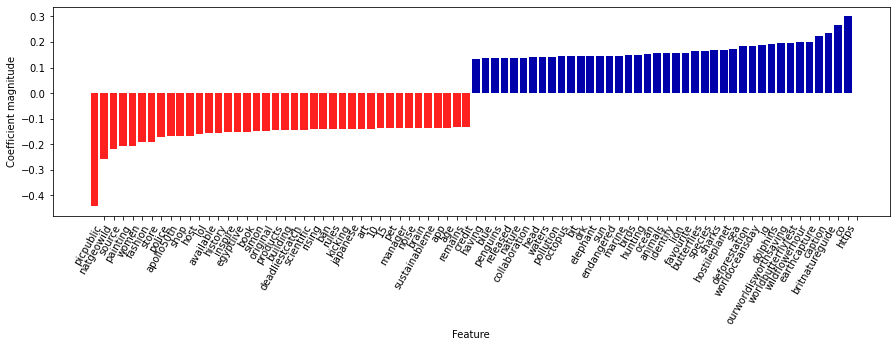

In [85]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

max_iter=5000

In [86]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
# running the grid-search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.78
Best parameters:
{'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 2)}


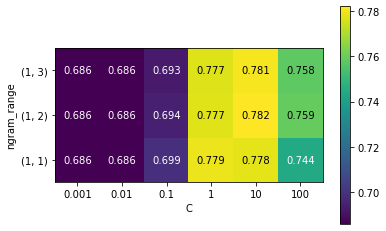

In [87]:
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

(-22.0, 22.0)

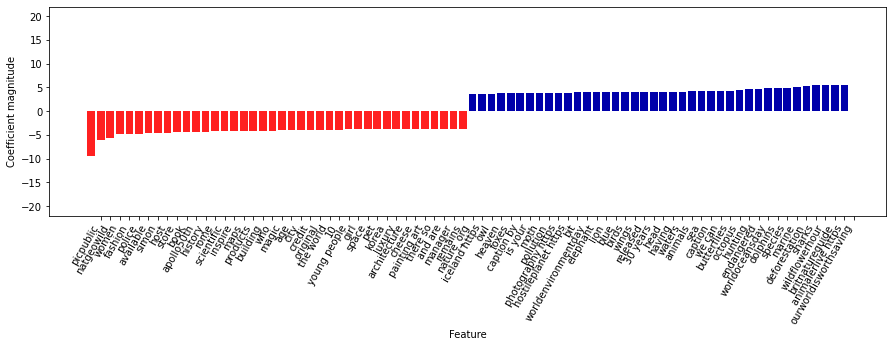

In [88]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.ylim(-22, 22)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

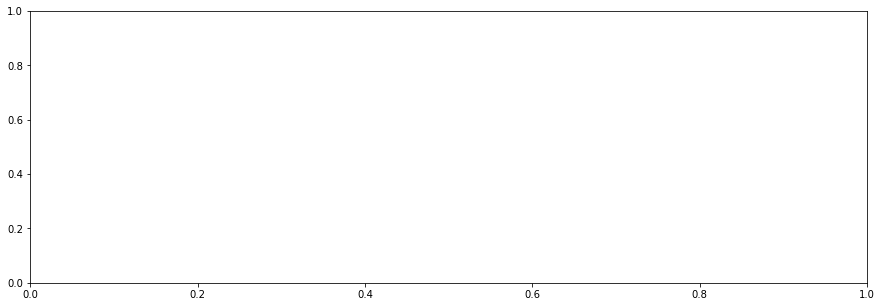

In [89]:
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)

In [90]:
y_pred = grid.best_estimator_.predict(X_train)

In [91]:
print(confusion_matrix(y_train, y_pred))

[[2550  284]
 [  88 6102]]


In [92]:
score_train = f1_score(y_train, y_pred, average = 'binary')
print('F-Measure: %.3f' % score_train)

F-Measure: 0.970


In [93]:
y_test_pred = grid.best_estimator_.predict(X_test)

In [94]:
print(confusion_matrix(y_test, y_test_pred))

[[ 792  574]
 [ 378 2701]]


In [95]:
score_test = f1_score(y_test, y_test_pred, average = 'binary')
print('F-Measure: %.3f' % score_test)

F-Measure: 0.850


In [96]:
actual = y_test.tolist() 
predicted = y_test_pred 
print (classification_report(actual, predicted) )

              precision    recall  f1-score   support

           0       0.68      0.58      0.62      1366
           1       0.82      0.88      0.85      3079

    accuracy                           0.79      4445
   macro avg       0.75      0.73      0.74      4445
weighted avg       0.78      0.79      0.78      4445

